In [1]:
import sys
sys.path.append('/home/fenglab/Desktop/transdiff_GRN/src/')

from find_modules import *
from topology import *
from rank_centrality import *

random_s = 10
random.seed(random_s)

In [2]:
treatments = ['Anp', 'AMn', 'AMp', 'AMnp']
colors = {'Anp':'#0088ff', 'AMn':'#ff6f00', 'AMp':'#00e883', 'AMnp':'#ffbf00'}

def read_topology(file):
    df = pd.read_csv(file, sep='\t', index_col=False)
    df = df[~(df['sigma'].isnull())&(df['sigma']!=np.inf)]
    df = df.sort_values(by=['nodes', 'edges'])
    return df

def plot_parameters(df, x='nodes', y='sigma', component='positive', rolling=30):
    ax_x = df[df['component']==component][x].rolling(rolling).mean()
    ax_y = df[df['component']==component][y].rolling(rolling).mean()
    stds = df[df['component']==component][y].rolling(rolling).std(ddof=9)
    return ax_x, ax_y, stds
    
def node_threshold_bin(df, run, bin_n=50, component='positive'):
    dft = df[(df['run']==run)&(df['component']==component)]
    dft['select_step'] = (dft['nodes']/bin_n).to_numpy(dtype=int)
    dft = dft.drop_duplicates(subset='select_step', keep='first')
    return list(dft['threshold'])

In [3]:
d_anp = read_topology(f'./../results/topology_{treatments[0]}.txt')
d_amn = read_topology(f'./../results/topology_{treatments[1]}.txt')
d_amp = read_topology(f'./../results/topology_{treatments[2]}.txt')
d_amnp = read_topology(f'./../results/topology_{treatments[3]}.txt')

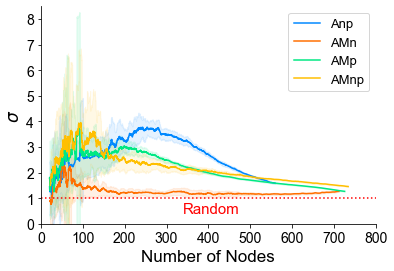

In [4]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

xa, ya, stda = plot_parameters(d_anp, x='nodes', y='sigma', component='positive', rolling=30)
xb, yb, stdb = plot_parameters(d_amn, x='nodes', y='sigma', component='positive', rolling=30)
xc, yc, stdc = plot_parameters(d_amp, x='nodes', y='sigma', component='positive', rolling=30)
xd, yd, stdd = plot_parameters(d_amnp, x='nodes', y='sigma', component='positive', rolling=30)

plt.plot(xa,ya,label=treatments[0], color=colors[treatments[0]])
plt.plot(xb,yb,label=treatments[1], color=colors[treatments[1]])
plt.plot(xc,yc,label=treatments[2], color=colors[treatments[2]])
plt.plot(xd,yd,label=treatments[3], color=colors[treatments[3]])

plt.fill_between(xa, ya-stda,ya+stda, color=colors[treatments[0]], alpha=0.1)
plt.fill_between(xb, yb-stdb,yb+stdb, color=colors[treatments[1]], alpha=0.1)
plt.fill_between(xc, yc-stdc,yc+stdc, color=colors[treatments[2]], alpha=0.1)
plt.fill_between(xd, yd-stdd,yd+stdd, color=colors[treatments[3]], alpha=0.1)

plt.axhline(y=1, color='red', linestyle=':')
plt.text(340, 0.4, 'Random', fontsize=15, color='red')
plt.xlim(left=0, right=800)
plt.ylim(bottom=0, top=8.5)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel(r'$\sigma$', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/3A.svg', pad_inches=0.1, bbox_inches='tight')

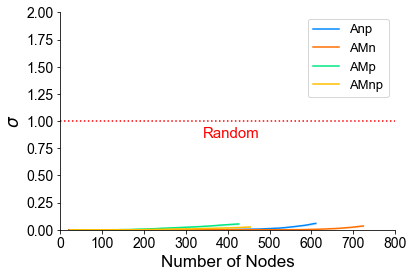

In [5]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

xa, ya, stda = plot_parameters(d_anp, x='nodes', y='sigma', component='negative', rolling=30)
xb, yb, stdb = plot_parameters(d_amn, x='nodes', y='sigma', component='negative', rolling=30)
xc, yc, stdc = plot_parameters(d_amp, x='nodes', y='sigma', component='negative', rolling=30)
xd, yd, stdd = plot_parameters(d_amnp, x='nodes', y='sigma', component='negative', rolling=30)

plt.plot(xa,ya,label=treatments[0], color=colors[treatments[0]])
plt.plot(xb,yb,label=treatments[1], color=colors[treatments[1]])
plt.plot(xc,yc,label=treatments[2], color=colors[treatments[2]])
plt.plot(xd,yd,label=treatments[3], color=colors[treatments[3]])

plt.fill_between(xa, ya-stda,ya+stda, color=colors[treatments[0]], alpha=0.1)
plt.fill_between(xb, yb-stdb,yb+stdb, color=colors[treatments[1]], alpha=0.1)
plt.fill_between(xc, yc-stdc,yc+stdc, color=colors[treatments[2]], alpha=0.1)
plt.fill_between(xd, yd-stdd,yd+stdd, color=colors[treatments[3]], alpha=0.1)

plt.axhline(y=1, color='red', linestyle=':')
plt.text(340, 0.85, 'Random', fontsize=15, color='red')
plt.xlim(left=0, right=800)
plt.ylim(bottom=0, top=2)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel(r'$\sigma$', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/S3A.svg', pad_inches=0.1, bbox_inches='tight')

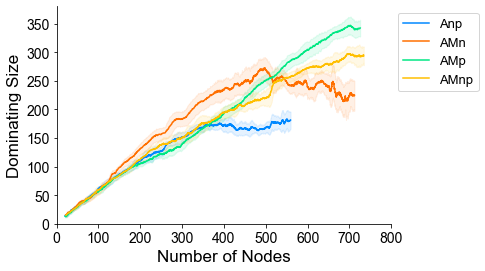

In [6]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

xa, ya, stda = plot_parameters(d_anp, x='nodes', y='dominating_size', component='positive', rolling=30)
xb, yb, stdb = plot_parameters(d_amn, x='nodes', y='dominating_size', component='positive', rolling=30)
xc, yc, stdc = plot_parameters(d_amp, x='nodes', y='dominating_size', component='positive', rolling=30)
xd, yd, stdd = plot_parameters(d_amnp, x='nodes', y='dominating_size', component='positive', rolling=30)

plt.plot(xa,ya,label=treatments[0], color=colors[treatments[0]])
plt.plot(xb,yb,label=treatments[1], color=colors[treatments[1]])
plt.plot(xc,yc,label=treatments[2], color=colors[treatments[2]])
plt.plot(xd,yd,label=treatments[3], color=colors[treatments[3]])

plt.fill_between(xa, ya-stda,ya+stda, color=colors[treatments[0]], alpha=0.1)
plt.fill_between(xb, yb-stdb,yb+stdb, color=colors[treatments[1]], alpha=0.1)
plt.fill_between(xc, yc-stdc,yc+stdc, color=colors[treatments[2]], alpha=0.1)
plt.fill_between(xd, yd-stdd,yd+stdd, color=colors[treatments[3]], alpha=0.1)

plt.xlim(left=0, right=800)
plt.ylim(bottom=0)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Dominating Size', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

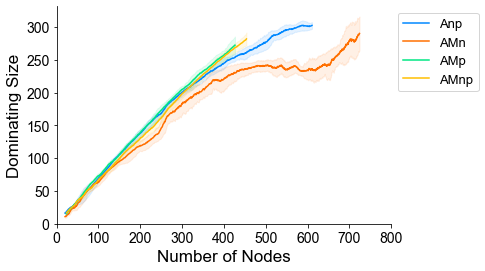

In [7]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

xa, ya, stda = plot_parameters(d_anp, x='nodes', y='dominating_size', component='negative', rolling=30)
xb, yb, stdb = plot_parameters(d_amn, x='nodes', y='dominating_size', component='negative', rolling=30)
xc, yc, stdc = plot_parameters(d_amp, x='nodes', y='dominating_size', component='negative', rolling=30)
xd, yd, stdd = plot_parameters(d_amnp, x='nodes', y='dominating_size', component='negative', rolling=30)

plt.plot(xa,ya,label=treatments[0], color=colors[treatments[0]])
plt.plot(xb,yb,label=treatments[1], color=colors[treatments[1]])
plt.plot(xc,yc,label=treatments[2], color=colors[treatments[2]])
plt.plot(xd,yd,label=treatments[3], color=colors[treatments[3]])

plt.fill_between(xa, ya-stda,ya+stda, color=colors[treatments[0]], alpha=0.1)
plt.fill_between(xb, yb-stdb,yb+stdb, color=colors[treatments[1]], alpha=0.1)
plt.fill_between(xc, yc-stdc,yc+stdc, color=colors[treatments[2]], alpha=0.1)
plt.fill_between(xd, yd-stdd,yd+stdd, color=colors[treatments[3]], alpha=0.1)

plt.xlim(left=0, right=800)
plt.ylim(bottom=0)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Dominating Size', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

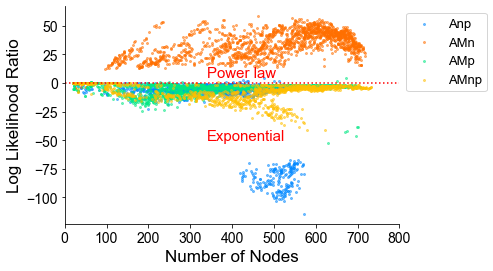

In [8]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

plt.scatter(d_anp[(d_anp['exp_p']<0.05)&(d_anp['component']=='positive')]['nodes'], 
            d_anp[(d_anp['exp_p']<0.05)&(d_anp['component']=='positive')]['exp_r'], 
            s=4, label=treatments[0], color=colors[treatments[0]], alpha=0.5)
plt.scatter(d_amn[(d_amn['exp_p']<0.05)&(d_amn['component']=='positive')]['nodes'], 
            d_amn[(d_amn['exp_p']<0.05)&(d_amn['component']=='positive')]['exp_r'], 
            s=4, label=treatments[1], color=colors[treatments[1]], alpha=0.5)
plt.scatter(d_amp[(d_amp['exp_p']<0.05)&(d_amp['component']=='positive')]['nodes'], 
            d_amp[(d_amp['exp_p']<0.05)&(d_amp['component']=='positive')]['exp_r'], 
            s=4, label=treatments[2], color=colors[treatments[2]], alpha=0.5)
plt.scatter(d_amnp[(d_amnp['exp_p']<0.05)&(d_amnp['component']=='positive')]['nodes'], 
            d_amnp[(d_amnp['exp_p']<0.05)&(d_amnp['component']=='positive')]['exp_r'], 
            s=4, label=treatments[3], color=colors[treatments[3]], alpha=0.5)

plt.axhline(y=0, color='red', linestyle=':')
plt.text(340, 5, 'Power law', fontsize=15, color='red')
plt.text(340, -50, 'Exponential', fontsize=15, color='red')
plt.xlim(left=0, right=800)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Log-Likelihood Ratio', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/3B.svg', pad_inches=0.1, bbox_inches='tight')

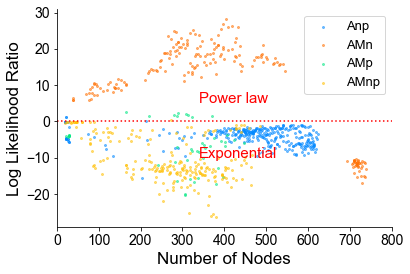

In [9]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

plt.scatter(d_anp[(d_anp['exp_p']<0.05)&(d_anp['component']=='negative')]['nodes'], 
            d_anp[(d_anp['exp_p']<0.05)&(d_anp['component']=='negative')]['exp_r'], 
            s=4, label=treatments[0], color=colors[treatments[0]], alpha=0.5)
plt.scatter(d_amn[(d_amn['exp_p']<0.05)&(d_amn['component']=='negative')]['nodes'], 
            d_amn[(d_amn['exp_p']<0.05)&(d_amn['component']=='negative')]['exp_r'], 
            s=4, label=treatments[1], color=colors[treatments[1]], alpha=0.5)
plt.scatter(d_amp[(d_amp['exp_p']<0.05)&(d_amp['component']=='negative')]['nodes'], 
            d_amp[(d_amp['exp_p']<0.05)&(d_amp['component']=='negative')]['exp_r'], 
            s=4, label=treatments[2], color=colors[treatments[2]], alpha=0.5)
plt.scatter(d_amnp[(d_amnp['exp_p']<0.05)&(d_amnp['component']=='negative')]['nodes'], 
            d_amnp[(d_amnp['exp_p']<0.05)&(d_amnp['component']=='negative')]['exp_r'], 
            s=4, label=treatments[3], color=colors[treatments[3]], alpha=0.5)

plt.text(340, 5, 'Power law', fontsize=15, color='red')
plt.text(340, -10, 'Exponential', fontsize=15, color='red')
plt.axhline(y=0, color='red', linestyle=':')
plt.xlim(left=0, right=800)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Log-Likelihood Ratio', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/S3B.svg', pad_inches=0.1, bbox_inches='tight')

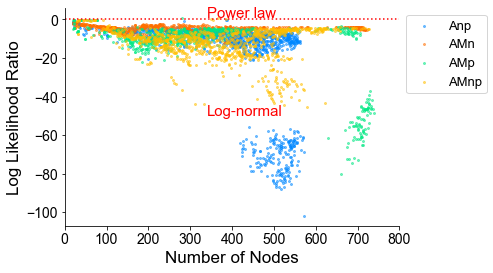

In [10]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

plt.scatter(d_anp[(d_anp['logn_p']<0.05)&(d_anp['component']=='positive')]['nodes'], 
            d_anp[(d_anp['logn_p']<0.05)&(d_anp['component']=='positive')]['logn_r'], 
            s=4, label=treatments[0], color=colors[treatments[0]], alpha=0.5)
plt.scatter(d_amn[(d_amn['logn_p']<0.05)&(d_amn['component']=='positive')]['nodes'], 
            d_amn[(d_amn['logn_p']<0.05)&(d_amn['component']=='positive')]['logn_r'], 
            s=4, label=treatments[1], color=colors[treatments[1]], alpha=0.5)
plt.scatter(d_amp[(d_amp['logn_p']<0.05)&(d_amp['component']=='positive')]['nodes'], 
            d_amp[(d_amp['logn_p']<0.05)&(d_amp['component']=='positive')]['logn_r'], 
            s=4, label=treatments[2], color=colors[treatments[2]], alpha=0.5)
plt.scatter(d_amnp[(d_amnp['logn_p']<0.05)&(d_amnp['component']=='positive')]['nodes'], 
            d_amnp[(d_amnp['logn_p']<0.05)&(d_amnp['component']=='positive')]['logn_r'], 
            s=4, label=treatments[3], color=colors[treatments[3]], alpha=0.5)

plt.text(340, 1, 'Power law', fontsize=15, color='red')
plt.text(340, -50, 'Log-normal', fontsize=15, color='red')
plt.axhline(y=0, color='red', linestyle=':')
plt.xlim(left=0, right=800)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Log-Likelihood Ratio', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/3C.svg', pad_inches=0.1, bbox_inches='tight')

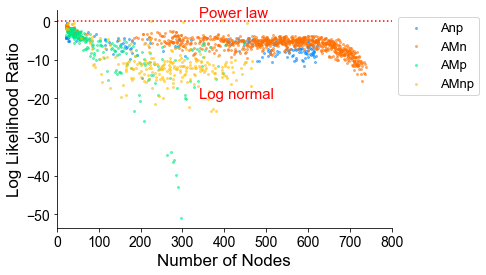

In [11]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

plt.scatter(d_anp[(d_anp['logn_p']<0.05)&(d_anp['component']=='negative')]['nodes'], 
            d_anp[(d_anp['logn_p']<0.05)&(d_anp['component']=='negative')]['logn_r'], 
            s=4, label=treatments[0], color=colors[treatments[0]], alpha=0.5)
plt.scatter(d_amn[(d_amn['logn_p']<0.05)&(d_amn['component']=='negative')]['nodes'], 
            d_amn[(d_amn['logn_p']<0.05)&(d_amn['component']=='negative')]['logn_r'], 
            s=4, label=treatments[1], color=colors[treatments[1]], alpha=0.5)
plt.scatter(d_amp[(d_amp['logn_p']<0.05)&(d_amp['component']=='negative')]['nodes'], 
            d_amp[(d_amp['logn_p']<0.05)&(d_amp['component']=='negative')]['logn_r'], 
            s=4, label=treatments[2], color=colors[treatments[2]], alpha=0.5)
plt.scatter(d_amnp[(d_amnp['logn_p']<0.05)&(d_amnp['component']=='negative')]['nodes'], 
            d_amnp[(d_amnp['logn_p']<0.05)&(d_amnp['component']=='negative')]['logn_r'], 
            s=4, label=treatments[3], color=colors[treatments[3]], alpha=0.5)

plt.text(340, 1, 'Power law', fontsize=15, color='red')
plt.text(340, -20, 'Log-normal', fontsize=15, color='red')
plt.axhline(y=0, color='red', linestyle=':')
plt.xlim(left=0, right=800)
plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel('Log-Likelihood Ratio', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), prop={'size':13})

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig('./../figs/S3C.svg', pad_inches=0.1, bbox_inches='tight')

In [12]:
# compute node centrality at GRN node size interval of 50
treatment = treatments[1]
lstruns = []
runs = list(np.arange(1,11))
for run in runs:
    lstrun = []
    DG = read_directed_grn(f'./../results/GRN/{treatment}_{run}.txt')
    thresholds = node_threshold_bin(d_amn, run)
    for threshold in thresholds:
        DGp = remove_edge(DG, threshold, component='positive')
        modules = louvain_cluster(DGp, random_state=True, random_s=random_s)
        lstrun.append(compute_grn_centrality(DGp, modules))
    lstruns.append(pd.concat(lstrun))
pd.concat(lstruns, keys=runs, names=['run']).to_csv(f'./../results/centrality_{treatment}.txt', sep='\t')

/home/fenglab/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/fenglab/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/fenglab/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se